In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import prepare 
import acquire  

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


import seaborn as sns
import matplotlib.pyplot as plt
from mergedeep import merge

In [2]:
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords, remove_urls, remove_unicode_text

In [3]:
from prepare import prepare_nlp_data

In [346]:
from scipy import stats

In [3]:
#Acquire the URLS for the Repositories to explore

headers = acquire.headers
endpoint = "https://api.github.com/search/repositories"
query = "customer in:name"
sort = "stars"
per_page = 100
order = "desc"
page = 1

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload = response.json()
#payload['items']

In [4]:
page = 2

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 178226060,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNzgyMjYwNjA=',
  'name': 'E-commerce-Customer-service-robot',
  'full_name': 'gongdelu/E-commerce-Customer-service-robot',
  'private': False,
  'owner': {'login': 'gongdelu',
   'id': 37997947,
   'node_id': 'MDQ6VXNlcjM3OTk3OTQ3',
   'avatar_url': 'https://avatars.githubusercontent.com/u/37997947?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gongdelu',
   'html_url': 'https://github.com/gongdelu',
   'followers_url': 'https://api.github.com/users/gongdelu/followers',
   'following_url': 'https://api.github.com/users/gongdelu/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gongdelu/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/gongdelu/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/gongdelu/subscriptions',
   'organizations_url': 'https://api.github.com/users/gongdelu/orgs',
   'repos_url': 'https://api.github.com/users/gongdelu/repos',


In [5]:
page = 3

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 118996371,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=',
  'name': 'CustomerChurn',
  'full_name': 'smit5490/CustomerChurn',
  'private': False,
  'owner': {'login': 'smit5490',
   'id': 13723626,
   'node_id': 'MDQ6VXNlcjEzNzIzNjI2',
   'avatar_url': 'https://avatars.githubusercontent.com/u/13723626?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/smit5490',
   'html_url': 'https://github.com/smit5490',
   'followers_url': 'https://api.github.com/users/smit5490/followers',
   'following_url': 'https://api.github.com/users/smit5490/following{/other_user}',
   'gists_url': 'https://api.github.com/users/smit5490/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/smit5490/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/smit5490/subscriptions',
   'organizations_url': 'https://api.github.com/users/smit5490/orgs',
   'repos_url': 'https://api.github.com/users/smit5490/repos',
   'events_url': 'https://api.github.com

In [6]:
#Convert the reponse to a data frame
urls_df = pd.DataFrame(payload['items'])

In [7]:
#Check the shape of the dataframe
urls_df.shape

(100, 79)

In [8]:
urls_df

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,118996371,MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=,CustomerChurn,smit5490/CustomerChurn,False,"{'login': 'smit5490', 'id': 13723626, 'node_id...",https://github.com/smit5490/CustomerChurn,None,False,https://api.github.com/repos/smit5490/Customer...,...,True,False,[],public,8,4,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
1,58745539,MDEwOlJlcG9zaXRvcnk1ODc0NTUzOQ==,vc-module-customer,VirtoCommerce/vc-module-customer,False,"{'login': 'VirtoCommerce', 'id': 5762443, 'nod...",https://github.com/VirtoCommerce/vc-module-cus...,Contacts management module,False,https://api.github.com/repos/VirtoCommerce/vc-...,...,True,False,[],public,21,14,10,dev,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
2,62332503,MDEwOlJlcG9zaXRvcnk2MjMzMjUwMw==,customer_portal,SonarSoftware/customer_portal,False,"{'login': 'SonarSoftware', 'id': 12124408, 'no...",https://github.com/SonarSoftware/customer_portal,A customer portal for Sonar.,False,https://api.github.com/repos/SonarSoftware/cus...,...,True,False,[],public,15,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
3,85580569,MDEwOlJlcG9zaXRvcnk4NTU4MDU2OQ==,customer-portal,oroinc/customer-portal,False,"{'login': 'oroinc', 'id': 4165718, 'node_id': ...",https://github.com/oroinc/customer-portal,OroCommerce package with customer portal and n...,False,https://api.github.com/repos/oroinc/customer-p...,...,True,False,[],public,15,5,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
4,47967191,MDEwOlJlcG9zaXRvcnk0Nzk2NzE5MQ==,customer-scripts,microsoft/customer-scripts,False,"{'login': 'microsoft', 'id': 6154722, 'node_id...",https://github.com/microsoft/customer-scripts,Repository of scripts provided frequently to o...,False,https://api.github.com/repos/microsoft/custome...,...,True,False,[],public,13,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69983058,MDEwOlJlcG9zaXRvcnk2OTk4MzA1OA==,ruby-sms-customer-engagement,Nexmo/ruby-sms-customer-engagement,False,"{'login': 'Nexmo', 'id': 551057, 'node_id': 'M...",https://github.com/Nexmo/ruby-sms-customer-eng...,Two-way SMS for customer engagement with Ruby,False,https://api.github.com/repos/Nexmo/ruby-sms-cu...,...,True,False,[tutorial],public,3,0,7,main,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
96,181278845,MDEwOlJlcG9zaXRvcnkxODEyNzg4NDU=,Kaggle_santander-customer-transaction-prediction,Rajneesh-Tiwari/Kaggle_santander-customer-tran...,False,"{'login': 'Rajneesh-Tiwari', 'id': 16912628, '...",https://github.com/Rajneesh-Tiwari/Kaggle_sant...,Code for 118th position in Kaggle santander-cu...,False,https://api.github.com/repos/Rajneesh-Tiwari/K...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
97,149399792,MDEwOlJlcG9zaXRvcnkxNDkzOTk3OTI=,Exploratory-Data-Analysis-Customer-Churn-Predi...,Shubha23/Exploratory-Data-Analysis-Customer-Ch...,False,"{'login': 'Shubha23', 'id': 17091320, 'node_id...",https://github.com/Shubha23/Exploratory-Data-A...,Application of K-means clustering. Prediction ...,False,https://api.github.com/repos/Shubha23/Explorat...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
98,113375100,MDEwOlJlcG9zaXRvcnkxMTMzNzUxMDA=,woocommerce-customer-source,devinsays/woocommerce-customer-source,False,"{'login': 'devinsays', 'id': 431879, 'node_id'...",https://github.com/devinsays/woocommerce-custo...,Learn where your WooCommerce customers are com...,False,https://api.github.com/repos/devinsays/woocomm...,...,True,False,[],public,2,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0


In [9]:
#Get a list of the full_name for the urls. Saved to acquire seperate file as repos and assigned to a variable
urls_df.full_name.to_list()

['smit5490/CustomerChurn',
 'VirtoCommerce/vc-module-customer',
 'SonarSoftware/customer_portal',
 'oroinc/customer-portal',
 'microsoft/customer-scripts',
 'correooke/example-customers-app',
 'darkdreamingdan/mlnd-customer-segments',
 'emilybache/CustomerSync-Refactoring-Kata',
 'devmentors/Pacco.Services.Customers',
 'bestkao/customer_segments',
 'toshi-k/kaggle-santander-customer-satisfaction',
 'cometchat-pro-tutorials/react-customer-support-live-widget',
 'celestinhermez/sparkify_customer_churn',
 'Ifihan/customer-management-app',
 'skioo/django-customer-billing',
 'anqi666/Customer-Data-Analysis',
 'ho-nl/magento1-Ho_Customer',
 'mutedblues/Customer-Success-Management',
 'aryashah2k/Datalogy-Customer-Segmentation-Data-Science-Internship',
 'Horizon733/customer-care-chatbot',
 'dserradji/reactive-customer-service',
 'Ashniu123/nestjs-customer-order-eventsourcing-cqrs',
 'M-R-K-Development/bc-customer-plugin',
 'melihbodr/Sentiment_analysis_to_customer_comments',
 'nd009/creating_c

In [65]:
#Use the scrape github function from the acquire module to acquire the dataframe containing the names of the
#repositories and the contents of the readme files
df = acquire.scrape_github_data()

#convert the data into a dataframe
df = pd.DataFrame(df)
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [314]:
# read in the json file generated by compiling the acquire.py file
df = pd.read_json('data2.json')

In [315]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [316]:
len(df)

200

In [317]:
def remove_unicode_text(df):
    for i in range(len(df)):
    
        df.contents[i] = re.sub(r'\<[^>]*\>', '', df.contents[i])
    
    return df

In [318]:
df['contents'] = df.readme_contents

In [319]:
df = remove_unicode_text(df)

In [320]:
df.head()

,repo,language,readme_contents,contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,> :warning: **BEWARE!**\n> This repository has...


In [321]:
df.contents[0]

'# E-commerce-Customer-service-robot\n电商多轮对话客服机器人\n\n数据集：18年公开的淘宝客服对话数据 https://github.com/cooelf/DeepUtteranceAggregation\n\n实现类别：生成式模型\n\n模型架构：Seq2Seq模型，编码器使用多层双向GRU,解码器使用多层单向GRU及全局注意力机制，训练模式使用了teacher forcing和梯度修剪技巧，测试模式则使用集束搜索技巧来生成回答\n\n依赖：\n  \n  torch 1.0.1\n  \n  jieba 0.38\n  \n  numpy 1.15.4\n'

In [322]:
df.contents[1]

"# FastTrack for Azure\n\nSee our [FastTrack for Azure landing page](https://azure.microsoft.com/programs/azure-fasttrack/partners) for more information.\n\n# Cloud Native Apps Scenarios\n\n* [E-Commerce](ecommerce/)\n* [Containerize an E-Commerce Site](containerizeecommercesite/)\n* [Event Driven Applications](event-driven-apps/)\n\n# Contributing\n\nThis project welcomes contributions and suggestions.  Most contributions require you to agree to a\nContributor License Agreement (CLA) declaring that you have the right to, and actually do, grant us\nthe rights to use your contribution. For details, visit https://cla.microsoft.com.\n\nWhen you submit a pull request, a CLA-bot will automatically determine whether you need to provide\na CLA and decorate the PR appropriately (e.g., label, comment). Simply follow the instructions\nprovided by the bot. You will only need to do this once across all repos using our CLA.\n\nThis project has adopted the [Microsoft Open Source Code of Conduct](htt

In [286]:
df.readme_contents[3]

'# Customer Analytics iPython Notebook\nSee http://kpei.me/blog/?p=921\n'

In [323]:
def remove_urls(df):
    '''
    This function removes urls from the string 
    '''
    for i in range(len(df)):
        res = []
        for j in df.contents[i].strip().split():
            if not re.search(r"(https?)", j):  
                res.append(re.sub(r"[^A-Za-z\.]", "", j).replace(".", " "))   
                df.contents[i] = " ".join(map(str.strip, res))
    return df


In [324]:
df = remove_urls(df)

In [289]:
df.contents[0]

' EcommerceCustomerservicerobot    SeqSeqGRUGRUteacher forcing  torch  jieba  numpy '

In [198]:
df.contents[1]

' FastTrack for Azure See our FastTrack for Azure landing for more information  Cloud Native Apps Scenarios  ECommerceecommerce  Containerize an ECommerce Sitecontainerizeecommercesite  Event Driven Applicationseventdrivenapps  Contributing This project welcomes contributions and suggestions Most contributions require you to agree to a Contributor License Agreement CLA declaring that you have the right to and actually do grant us the rights to use your contribution For details visit When you submit a pull request a CLAbot will automatically determine whether you need to provide a CLA and decorate the PR appropriately e g label comment Simply follow the instructions provided by the bot You will only need to do this once across all repos using our CLA This project has adopted the Microsoft Open Source Code of For more information see the Code of Conduct or contact opencodemicrosoft commailtoopencodemicrosoft com with any additional questions or comments  Legal Notices Microsoft and any c

In [149]:
df.readme_contents[2]

''

In [325]:
def is_foreign(texts):
    '''
    This function takes in a dataframe and return true if the scanned text is i†gn chinese
    '''
    if re.search("[\u3040-\u30ff\u3400-\u4dbf\u4e00-\u9fff\uf900-\ufaff\uff66-\uff9f\u3131-\uD79D]", texts):
            return True

In [326]:
df = df[df.readme_contents.apply(is_foreign) !=True]

In [327]:
df.readme_contents[1]

"# FastTrack for Azure\n\nSee our [FastTrack for Azure landing page](https://azure.microsoft.com/programs/azure-fasttrack/partners) for more information.\n\n# Cloud Native Apps Scenarios\n\n* [E-Commerce](ecommerce/)\n* [Containerize an E-Commerce Site](containerizeecommercesite/)\n* [Event Driven Applications](event-driven-apps/)\n\n# Contributing\n\nThis project welcomes contributions and suggestions.  Most contributions require you to agree to a\nContributor License Agreement (CLA) declaring that you have the right to, and actually do, grant us\nthe rights to use your contribution. For details, visit https://cla.microsoft.com.\n\nWhen you submit a pull request, a CLA-bot will automatically determine whether you need to provide\na CLA and decorate the PR appropriately (e.g., label, comment). Simply follow the instructions\nprovided by the bot. You will only need to do this once across all repos using our CLA.\n\nThis project has adopted the [Microsoft Open Source Code of Conduct](htt

In [237]:
df.head()

,repo,language,readme_contents,contents
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...,FastTrack for Azure See our FastTrack for Azu...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...
5,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...


In [328]:
# do drop unneeded data first then prep
df = prepare.drop_unneeded_data(df)

In [239]:
df.head()

,repo,language,readme_contents,contents
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...


In [329]:
df = prepare_nlp_data(df, content = 'readme_contents')

In [330]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...


## Explore

### What are the most common words in READme files?

In [161]:
words = ' '.join(df.stemmed)

In [162]:
words[0:1500]

'ecommercecustomerservicerobot seqseqgrugruteach forc torch jieba numpi custom analyt ipython notebook see warn bewar repositori deprec maintain evolv syliu team still use compat syliu version risk bug fix custom order cancel plugin plugin allow custom cancel place order process screenshot show custom order page cancel buttonsdocsscreenshot png busi valu far custom chang mind alreadi place order administr cancel order howev ask question cant custom cancel order yet paid come custom order cancel plugin allow cancel unpaid order straight order histori view instal bewar instal instruct assum your use symfoni flex dont take look legaci instal instructiondocslegacyinstal md howev strongli encourag use symfoni flex much quicker instal plugin requir compos bash compos requir syliuscustomerordercancellationplugin rememb allow commun recip compos config extra symfoni allowcontrib true plugin instal process extens point custom order cancel plugin use order entiti deriv syliuscorebundl well alrea

In [163]:
frequencies = pd.Series(words.split()).value_counts()

In [164]:
frequencies.head(50)

custom      923
data        424
use         407
model       258
creat       209
instal      169
project     151
file        150
run         150
featur      147
new         144
notebook    136
account     133
magento     128
set         127
segment     115
png         110
valu        107
code        106
churn       106
select      105
product     103
follow      103
predict     102
click       101
servic       95
login        94
one          93
market       92
need         91
email        90
deploy       90
compani      90
provid       89
inform       89
requir       89
test         89
page         89
name         88
approv       87
view         86
function     85
time         85
also         82
get          82
add          81
api          80
applic       80
configur     79
learn        79
dtype: int64

In [165]:
top_20_words = frequencies.head(20)

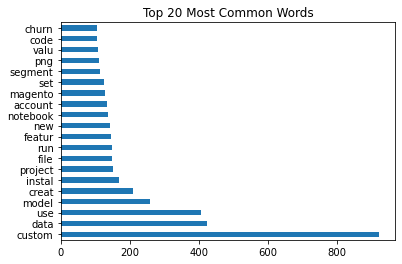

In [166]:
top_20_words.plot.barh()
title = plt.title('Top 20 Most Common Words')

In [167]:
from wordcloud import WordCloud

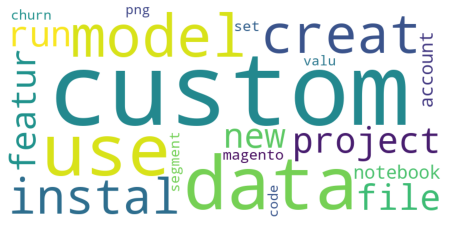

In [168]:
data = {k: v for k, v in top_20_words.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Does the length of the README vary by programming language?

In [293]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...


In [331]:
length_readme = []
for i in range(len(df)):
    length_readme.append(len(df.readme_contents[i]))

In [332]:
length_readme_df = pd.DataFrame(length_readme)

In [333]:
df = pd.concat([df, length_readme_df], axis = 1)

In [334]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized,0
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2380
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,3410
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4959


In [335]:
df.rename(columns = {0: "length"}, inplace = True)

In [336]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized,length
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2380
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,3410
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4959


In [337]:
df.language.value_counts()

Jupyter Notebook    45
PHP                 37
JavaScript          20
Python              20
Name: language, dtype: int64

In [339]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [340]:
php.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized,length
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2380
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,3410
6,php-cuong/magento2-customer-avatar,PHP,# Magento 2 Customer Avatar\nThis is an awesom...,Magento Customer Avatar This is an awesome m...,magento 2 customer avatar awesome module allow...,magento 2 custom avatar awesom modul allow cus...,magento 2 customer avatar awesome module allow...,2399
7,printu/customerio,PHP,# Customer.io API Client\n\nPHP bindings for t...,Customer io API Client PHP bindings for the C...,customerio api client php bindings customerio ...,customerio api client php bind customerio api ...,customerio api client php binding customerio a...,6169
8,kiwicommerce/magento2-login-as-customer,PHP,"# We're not maintaining this extension, if you...",Were not maintaining this extension if you ne...,maintaining extension need support please cont...,maintain extens need support pleas contact us ...,maintaining extension need support please cont...,4357


In [341]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [342]:
dataframes = [jupyter, php, python, java]
for lang in dataframes:
    print(lang.language[0])
    print("Median READme length", lang.length.median())
    print("Mean READme length", lang.length.mean())
    print(" ")

Jupyter Notebook
Median READme length 2568.0
Mean READme length 4494.0888888888885
 
PHP
Median READme length 1264.0
Mean READme length 2192.2702702702704
 
Python
Median READme length 932.5
Mean READme length 2080.5
 
JavaScript
Median READme length 2421.0
Mean READme length 3733.6
 


In [348]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average READme length vs Jupyter average length")
    print(stats.ttest_ind(lang.length, jupyter.length))
    print(" ")

PHP average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.7408191187806599, pvalue=0.08555996157570454)
 
Python average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.3666603407222784, pvalue=0.17658947521300855)
 
JavaScript average READme length vs Jupyter average length
Ttest_indResult(statistic=-0.41714395876768623, pvalue=0.67799119273692)
 


In [349]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average READme length vs PHP average length")
    print(stats.ttest_ind(lang.length, php.length))
    print(" ")

Python average READme length vs PHP average length
Ttest_indResult(statistic=-0.12993166263772754, pvalue=0.8970945337887178)
 
JavaScript average READme length vs PHP average length
Ttest_indResult(statistic=1.5490392034240013, pvalue=0.1271077935377544)
 


In [350]:
print("Python average READme length vs Java average length")
print(stats.ttest_ind(python.length, java.length))

Python average READme length vs Java average length
Ttest_indResult(statistic=-1.3294219876611202, pvalue=0.19163511575888698)


None of the average READme lengths are significantly different from one another.

In [411]:
for lang in dataframes:
    print(lang.language[0], "READme length vs all languages READme lengths")
    print(stats.ttest_1samp(lang.length, df.length.mean()))
    print(" ")

Jupyter Notebook READme length vs all languages READme lengths
Ttest_1sampResult(statistic=1.0808476822486943, pvalue=0.2856536225966103)
 
PHP READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-2.19707431419449, pvalue=0.034535466277791166)
 
Python READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-1.6291924701179021, pvalue=0.11973989904097682)
 
JavaScript READme length vs all languages READme lengths
Ttest_1sampResult(statistic=0.45610680265641407, pvalue=0.6534835944340551)
 


None of the language READme lengths differ significantly from the population READme lengths.

### Do different programming languages use a different number of unique words?

In [371]:
jupyter_words = ' '.join(jupyter.stemmed)

In [373]:
jupyter_unique_words = len(set(re.findall('\w+', jupyter_words)))

In [374]:
jupyter_unique_words

3238

In [375]:
php_words = ' '.join(php.stemmed)

In [378]:
php_unique_words = len(set(re.findall('\w+', php_words)))

In [379]:
php_unique_words

1485

In [380]:
python_words = ' '.join(python.stemmed)

In [381]:
python_unique_words = len(set(re.findall('\w+', python_words)))

In [382]:
python_unique_words

1258

In [383]:
java_words = ' '.join(java.stemmed)

In [384]:
java_unique_words = len(set(re.findall('\w+', java_words)))

In [385]:
java_unique_words

1610

In [ ]:
len(set(re.findall('\w+', text.lower())))

In [388]:
all_words_unique = []
for i in range(len(df)):
    all_words_unique.append(len(set(re.findall('\w+', df.stemmed[i]))))

In [392]:
words_unique_df = pd.DataFrame(all_words_unique)

In [393]:
df = pd.concat([df, words_unique_df], axis = 1)

In [394]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized,length,0
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69,6
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2380,119
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515,26
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,3410,158
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4959,182


In [396]:
df.rename(columns = {0: "unique_words"}, inplace = True)

In [397]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [398]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [399]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average unique words vs Jupyter average unique words")
    print(stats.ttest_ind(lang.unique_words, jupyter.unique_words))
    print(" ")

PHP average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-2.411013392990093, pvalue=0.018200571752838502)
 
Python average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-1.5310592695483247, pvalue=0.1307610577567134)
 
JavaScript average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-0.5620985648876782, pvalue=0.576043385734222)
 


In [401]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average unique words vs PHP average unique words")
    print(stats.ttest_ind(lang.unique_words, php.unique_words))
    print(" ")

Python average unique words vs PHP average unique words
Ttest_indResult(statistic=0.34066366514386914, pvalue=0.734654642543862)
 
JavaScript average unique words vs PHP average unique words
Ttest_indResult(statistic=2.0372787991960486, pvalue=0.04644536609239968)
 


In [402]:
print("Python average unique words vs Java average unique words")
print(stats.ttest_ind(python.unique_words, java.unique_words))

Python average unique words vs Java average unique words
Ttest_indResult(statistic=-1.1349440923264205, pvalue=0.26350715431288135)


- Javascript unique words differs significantly from PHP.
- Jupyter Notebook differs significantly from PHP.

In [406]:
df.head()

,repo,language,readme_contents,contents,clean,stemmed,lemmatized,length,unique_words
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,Customer Analytics iPython Notebook See,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69,6
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2380,119
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",Recency Frequency and Monetary RFM Customer S...,recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515,26
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning BEWARE This repository has been depr...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,3410,158
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,Business Problem Problem statement The goal...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4959,182


In [409]:
dataframes = [jupyter, php, python, java]

In [410]:
for lang in dataframes:
    print(lang.language[0], "unique words vs all languages unique words")
    print(stats.ttest_1samp(lang.unique_words, df.unique_words.mean()))
    print(" ")

Jupyter Notebook unique words vs all languages unique words
Ttest_1sampResult(statistic=1.4154428921004227, pvalue=0.16397814558452722)
 
PHP unique words vs all languages unique words
Ttest_1sampResult(statistic=-3.35156869403743, pvalue=0.0018987739371024133)
 
Python unique words vs all languages unique words
Ttest_1sampResult(statistic=-1.12779999696824, pvalue=0.27344544662770975)
 
JavaScript unique words vs all languages unique words
Ttest_1sampResult(statistic=0.48938799863654026, pvalue=0.630169136627861)
 


Only PHP has significantly different unique word from the population.